In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [20]:
t1 = pd.read_csv("Trip 1 - 20170303/20170303_sec.csv")
t2 = pd.read_csv("Trip 2 - 20170307/20170307_sec.csv")
t3 = pd.read_csv("Trip 3 - 20170308/20170308_sec.csv")
t3 = pd.read_csv("Trip 4 - 20170309/20170309_sec.csv")
t5 = pd.read_csv("Trip 5 - 20170407/20170407_sec.csv")

In [17]:
t1.head()

,gpsDate,latitude,longitude,Power_Mode,Fuel_Consum,GD_Engine_Temp,Steering_Angle_Speed,Transmission_Type,Vehicle_Speed,Engine_Speed,...,RR_Window_State,Driver_Window_State,RL_Window_State,AccelFB,AccelLR,Inlet_Switch_Indicator,AC_Blower_Level,WhilteLine_Left,LKA_Steering_Support,WhilteLine_Right
0,2017-03-03T14:05:06,33.639271,-112.227554,0.0,0.5265,999.0,999.0,3.0,0.0,1292.96875,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,0.0,2.0
1,2017-03-03T14:05:07,33.639271,-112.227556,0.0,0.5265,999.0,999.0,3.0,0.0,1294.53125,...,NaN,NaN,NaN,-0.101512,-0.101512,NaN,NaN,2.0,0.0,2.0
2,2017-03-03T14:05:08,33.639273,-112.227559,0.0,0.5300,999.0,999.0,3.0,0.0,1298.43750,...,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN
3,2017-03-03T14:05:09,33.639275,-112.227559,0.0,0.5310,999.0,999.0,3.0,0.0,1294.53125,...,NaN,NaN,NaN,-0.101512,-0.101512,NaN,NaN,2.0,0.0,2.0
4,2017-03-03T14:05:10,33.639275,-112.227561,0.0,0.5320,999.0,999.0,3.0,0.0,1297.65625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


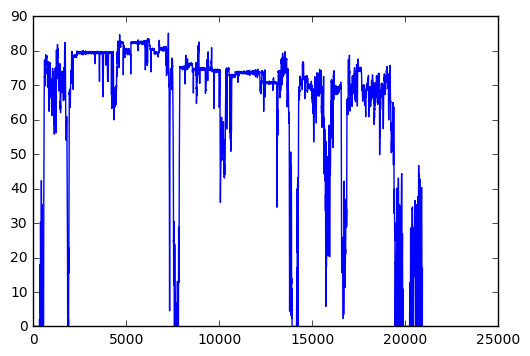

In [4]:
plt.plot(t1['Vehicle_Speed'])
plt.show()

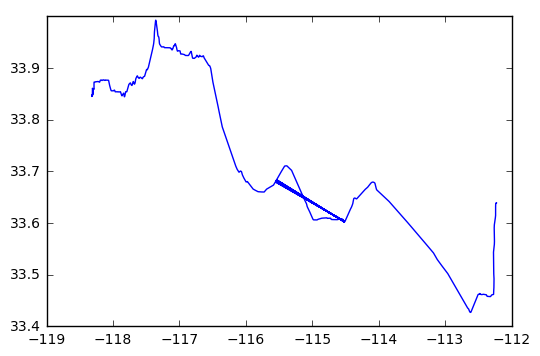

In [5]:
plt.plot(t1['longitude'], t1['latitude'])
plt.show()

In [6]:
print t1['gpsDate'][0], list(t1['gpsDate'])[-1]

2017-03-03T14:05:06 2017-03-03T20:56:24


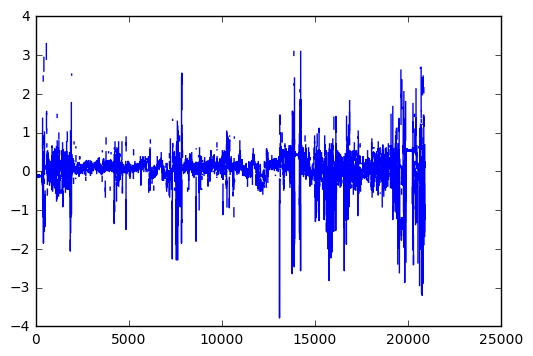

In [18]:
plt.plot(t1['AccelFB'])
plt.show()